In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [2]:
#讀檔
dataset = pd.read_csv('input/titanic.csv')
dataset.head(50)#SHOW 50 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#觀察資料幾列幾行
dataset.shape

(891, 12)

In [4]:
#觀察整個資料集的資訊
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#設定seaborn為預設繪圖library
sns.set()

In [6]:
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

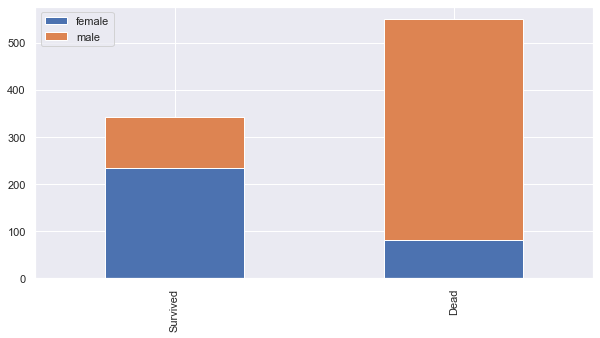

In [7]:
#分別秀出生還/死亡的男女長條圖
bar_chart('Sex')

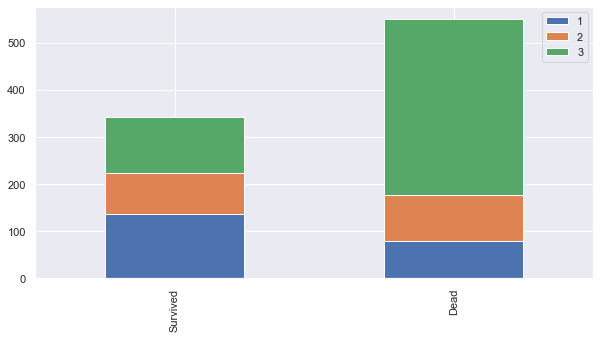

In [8]:
#分別秀出生還/死亡的艙等長條圖
bar_chart('Pclass')

In [9]:
# 計算各個行(欄位)裡有多少個“NaN”
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [10]:
#觀察Name欄位
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#取出Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [12]:
#統計各稱謂的人數
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Don           1
Countess      1
Ms            1
Sir           1
Jonkheer      1
Mme           1
Lady          1
Name: Title, dtype: int64

In [13]:
#titlemapping
#title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master":3, "Dr": 3, "Rev":3, "Major":3, "Col":3, "Mlle":3, "Ms":3, "Sir":3, "Jonkheer":3, "Don":3, "Lady":3, "Mme":3, "Countess":3, "Capt":3}
#dataset['Title'] = dataset['Title'].map(title_mapping)
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2}
dataset['Title'] = list(map(int, dataset['Title'].map(title_mapping).replace(np.nan, 3)))


In [14]:
#現在的dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
#現在的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


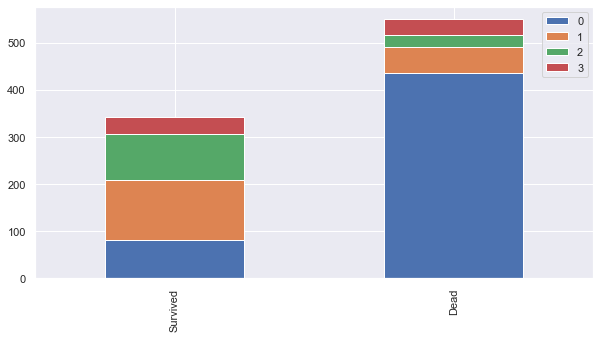

In [16]:
#秀出Title/生還死亡的分佈
bar_chart('Title')

In [17]:
# 刪除Name欄位
dataset.drop('Name', axis=1, inplace=True)

In [18]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# Sex

In [19]:
#mapping sex
sex_mapping ={"male":0, "female":1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

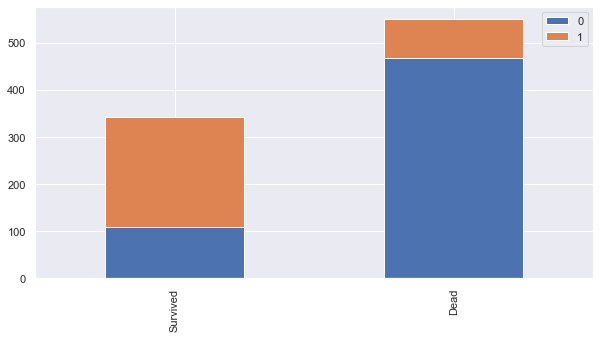

In [20]:
bar_chart('Sex')

In [21]:
#目前的dataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


# Age

In [22]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
dataset['Age'].fillna(dataset.groupby("Title")['Age'].transform("median"), inplace=True) #補中位數
dataset['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

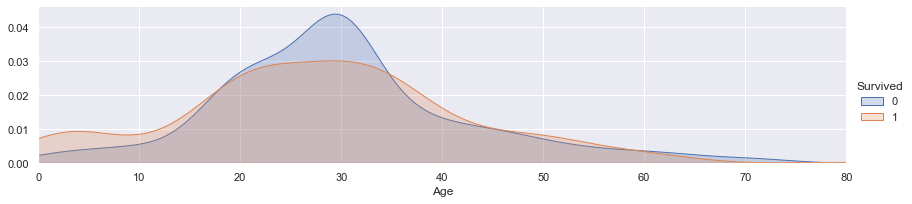

In [23]:
#年齡/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [24]:
#依年齡區間做mapping function
dataset.loc[ dataset['Age']<= 16, 'Age'] = 0
dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [25]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


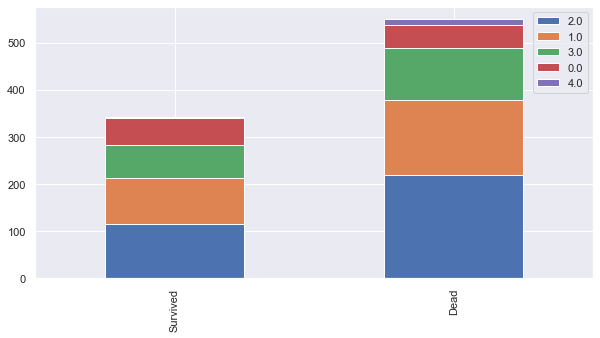

In [26]:
#秀出年齡/生還死亡的分佈
bar_chart('Age')

# Embarked (登船地點)

<AxesSubplot:>

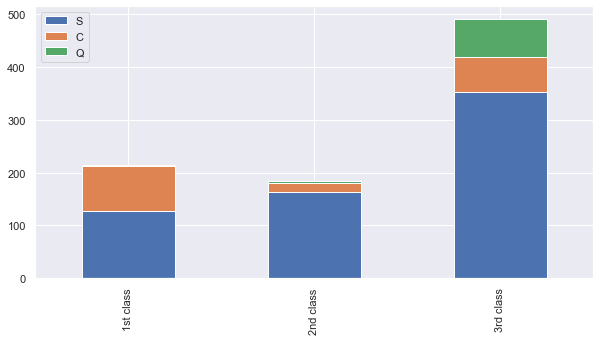

In [27]:
#分析各票種登船地點人數
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [28]:
#填補登船地點缺失資料
dataset['Embarked'] = dataset['Embarked'].fillna("S")
# 因為每個艙等超過 50% 都是從 S 登船的，所以補值 S
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2


In [29]:
# 登船地點的Mapping Function
embarked_mapping = {"S":0, "C":1, "Q":2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2


# Fare(票價)

In [30]:
#填補票價缺失的資料 
dataset['Fare'].fillna(dataset.groupby("Pclass")['Fare'].transform("median"), inplace=True)
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


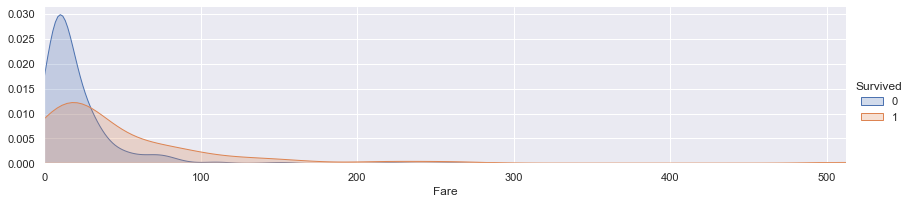

In [31]:
#票價/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [32]:
#依票價區間做mapping function
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [33]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [34]:
#觀察船艙編號資料
dataset['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
A16            1
F38            1
T              1
C95            1
C91            1
Name: Cabin, Length: 147, dtype: int64

In [35]:
#觀察船艙編號資料 =>取出第一個字母
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:>

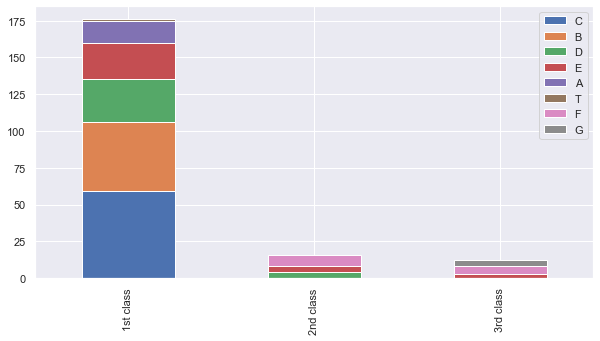

In [36]:
#分析各票種船艙種類人數
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
#df.index = ['1st class','2nd class', '3rd class']
#df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
#船艙Mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8} #故意讓數值有變異性
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)



In [38]:
#填補船艙種類缺失資料
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [39]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


# Sibsp & Parch

In [40]:
#合併Sibsp & Parch
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1 #要包含自己

(0.0, 11.0)

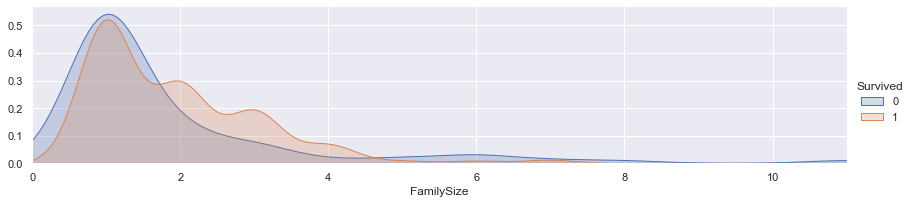

In [41]:
#家族人口/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [42]:
#家族人口的Mapping Function
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}#為了讓數值有一些變異才用float mapping
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [43]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# 資料清洗

In [44]:
#刪除Sibsp, Parch, Ticket
features_drop = ['Ticket', 'SibSp', 'Parch','PassengerId']
dataset = dataset.drop(features_drop, axis=1)

In [45]:
#設定預測目標變數與解釋變數
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset['Survived']
dataset_data.shape, dataset_target.shape


((891, 8), (891,))

In [46]:
#目前的所有解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [47]:
#確認欄位的資料型態均為數值型別
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# 建置模型-DNN

In [48]:
#導入keras與sklearn
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from sklearn import preprocessing

In [49]:
#建立模型函式
def build_model():
 #建立模型
    model = Sequential()
    #將模型疊起
    model.add(Dense(input_dim=8,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [50]:
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [51]:
#feature標準化(important)
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(dataset_data)
scaledFeatures

array([[1.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        0.1       ],
       [0.        , 1.        , 0.75      , ..., 0.5       , 0.66666667,
        0.1       ],
       [1.        , 1.        , 0.25      , ..., 0.        , 0.33333333,
        0.        ],
       ...,
       [1.        , 1.        , 0.25      , ..., 0.        , 0.33333333,
        0.3       ],
       [0.        , 0.        , 0.25      , ..., 0.5       , 0.        ,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ]])

In [68]:
#訓練模型
model = build_model()

#開始訓練模型
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])
train_history = model.fit(scaledFeatures, dataset_target,validation_split=0.2, batch_size=20, epochs=60)

#顯示訓練結果
score = model.evaluate(x=dataset_data, y=dataset_target)
print ('\nTrain Acc:', score[1])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                360       
_________________________________________________________________
activation_4 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

Epoch 53/60
36/36 [==============================] - 0s 5ms/step - loss: 0.3573 - acc: 0.8601 - val_loss: 0.3383 - val_acc: 0.8715
Epoch 54/60
36/36 [==============================] - 0s 4ms/step - loss: 0.3416 - acc: 0.8697 - val_loss: 0.3420 - val_acc: 0.8715
Epoch 55/60
36/36 [==============================] - 0s 4ms/step - loss: 0.3526 - acc: 0.8642 - val_loss: 0.3431 - val_acc: 0.8547
Epoch 56/60
36/36 [==============================] - 0s 6ms/step - loss: 0.3693 - acc: 0.8533 - val_loss: 0.3356 - val_acc: 0.8715
Epoch 57/60
36/36 [==============================] - 0s 4ms/step - loss: 0.3598 - acc: 0.8540 - val_loss: 0.3578 - val_acc: 0.8547
Epoch 58/60
36/36 [==============================] - 0s 5ms/step - loss: 0.3433 - acc: 0.8615 - val_loss: 0.4036 - val_acc: 0.8436
Epoch 59/60
36/36 [==============================] - 0s 4ms/step - loss: 0.4257 - acc: 0.8266 - val_loss: 0.3709 - val_acc: 0.8547
Epoch 60/60
28/28 [==============================] - 0s 3ms/step - loss: 1.2596 - a

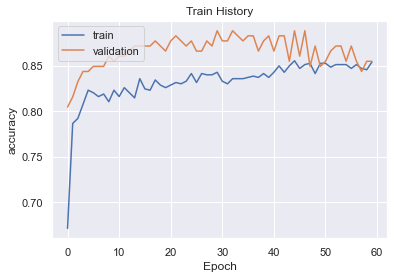

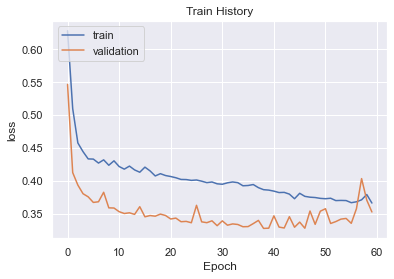

In [69]:
#顯示訓練結果
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

# Testing Data from Kaggle

In [70]:
#處理Testing資料
testset = pd.read_csv('input/testfromKaggle.csv')
testset.head(50)#SHOW 50

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [71]:
#處理Name
#取出Mr., Mrs., Miss
testset['Title'] = testset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2}
testset['Title'] = list(map(int, testset['Title'].map(title_mapping).replace(np.nan, 3)))
# 刪除Name欄位
testset.drop('Name', axis=1, inplace=True)

In [72]:
#mapping sex
sex_mapping ={"male":0, "female":1}
testset['Sex'] = testset['Sex'].map(sex_mapping)

In [73]:
#處理Age
testset['Age'].fillna(testset.groupby("Title")['Age'].transform("median"), inplace=True) #補中位數
#依年齡區間做mapping function
testset.loc[ testset['Age']<= 16, 'Age'] = 0
testset.loc[ (testset['Age'] > 16) & (testset['Age'] <= 26), 'Age'] = 1
testset.loc[ (testset['Age'] > 26) & (testset['Age'] <= 36), 'Age'] = 2
testset.loc[ (testset['Age'] > 36) & (testset['Age'] <= 62), 'Age'] = 3
testset.loc[ testset['Age'] > 62, 'Age'] = 4

In [74]:
#處理Embarked
#填補登船地點缺失資料
testset['Embarked'] = testset['Embarked'].fillna("S")# 因為每個艙等超過 50% 都是從 S 登船的，所以補值 S
# 登船地點的Mapping Function
embarked_mapping = {"S":0, "C":1, "Q":2}
testset['Embarked'] = testset['Embarked'].map(embarked_mapping)


In [75]:
#處理Fare
#填補票價缺失的資料 
testset['Fare'].fillna(testset.groupby("Pclass")['Fare'].transform("median"), inplace=True)
#依票價區間做mapping function
testset.loc[ testset['Fare'] <= 17, 'Fare'] = 0
testset.loc[ (testset['Fare'] > 17) & (testset['Fare'] <= 30), 'Fare'] = 1
testset.loc[ (testset['Fare'] > 30) & (testset['Fare'] <= 100), 'Fare'] = 2
testset.loc[ testset['Fare'] > 100, 'Fare'] = 3

#觀察船艙編號資料 =>取出第一個字母
testset['Cabin'] = testset['Cabin'].str[:1]

#船艙Mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8} #故意讓數值有變異性
testset['Cabin'] = testset['Cabin'].map(cabin_mapping)
#填補船艙種類缺失資料
testset["Cabin"].fillna(testset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


In [76]:
#合併Sibsp & Parch
testset["FamilySize"] = testset["SibSp"] + testset["Parch"] + 1 #要包含自己
#家族人口的Mapping Function
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}#為了讓數值有一些變異才用float mapping
testset['FamilySize'] = testset['FamilySize'].map(family_mapping)

In [77]:
#清洗
#刪除Sibsp, Parch, Ticket
features_drop = ['Ticket', 'SibSp', 'Parch','PassengerId']
testset = testset.drop(features_drop, axis=1)
testset

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0,0.0
414,1,1,3.0,3.0,0.8,1,3,0.0
415,3,0,3.0,0.0,2.0,0,0,0.0
416,3,0,2.0,0.0,2.0,0,0,0.0


In [78]:
#確認欄位的資料型態均為數值型別
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    int64  
 7   FamilySize  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [79]:
#feature標準化(important)
#minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
test_scaledFeatures = minmax_scale.fit_transform(testset)

In [80]:
probability = model.predict(test_scaledFeatures)
probability

array([[0.05851385],
       [0.37730646],
       [0.02560464],
       [0.10521737],
       [0.69506156],
       [0.21648142],
       [0.6398558 ],
       [0.11254039],
       [0.8442258 ],
       [0.06263173],
       [0.10521737],
       [0.364361  ],
       [0.97537804],
       [0.0674054 ],
       [0.9876127 ],
       [0.98500234],
       [0.04117781],
       [0.15758532],
       [0.3360896 ],
       [0.46106097],
       [0.53188384],
       [0.9794901 ],
       [0.98540926],
       [0.69875646],
       [0.97488683],
       [0.06364211],
       [0.9816362 ],
       [0.15758532],
       [0.29366368],
       [0.0704298 ],
       [0.08167264],
       [0.1270833 ],
       [0.407079  ],
       [0.27619988],
       [0.62294924],
       [0.15758532],
       [0.54689324],
       [0.54689324],
       [0.12729627],
       [0.59318274],
       [0.07030749],
       [0.66402847],
       [0.08619955],
       [0.9476277 ],
       [0.98529613],
       [0.12729627],
       [0.19078472],
       [0.058

In [81]:
n = 892
data =[]
for pro in probability:
    if pro > 0.5:
        data.append([n , 1])
    else:
        data.append([n , 0])
    n = n+1
data       

[[892, 0],
 [893, 0],
 [894, 0],
 [895, 0],
 [896, 1],
 [897, 0],
 [898, 1],
 [899, 0],
 [900, 1],
 [901, 0],
 [902, 0],
 [903, 0],
 [904, 1],
 [905, 0],
 [906, 1],
 [907, 1],
 [908, 0],
 [909, 0],
 [910, 0],
 [911, 0],
 [912, 1],
 [913, 1],
 [914, 1],
 [915, 1],
 [916, 1],
 [917, 0],
 [918, 1],
 [919, 0],
 [920, 0],
 [921, 0],
 [922, 0],
 [923, 0],
 [924, 0],
 [925, 0],
 [926, 1],
 [927, 0],
 [928, 1],
 [929, 1],
 [930, 0],
 [931, 1],
 [932, 0],
 [933, 1],
 [934, 0],
 [935, 1],
 [936, 1],
 [937, 0],
 [938, 0],
 [939, 0],
 [940, 1],
 [941, 1],
 [942, 0],
 [943, 0],
 [944, 1],
 [945, 1],
 [946, 0],
 [947, 0],
 [948, 0],
 [949, 0],
 [950, 0],
 [951, 1],
 [952, 0],
 [953, 0],
 [954, 0],
 [955, 1],
 [956, 1],
 [957, 1],
 [958, 1],
 [959, 0],
 [960, 0],
 [961, 1],
 [962, 1],
 [963, 0],
 [964, 0],
 [965, 0],
 [966, 1],
 [967, 0],
 [968, 0],
 [969, 1],
 [970, 0],
 [971, 1],
 [972, 1],
 [973, 0],
 [974, 0],
 [975, 0],
 [976, 0],
 [977, 0],
 [978, 1],
 [979, 1],
 [980, 1],
 [981, 1],
 [982, 1],

In [82]:
submission = pd.DataFrame(data, columns = ['PassengerId', 'Survived']) 
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
submission.to_csv('submission_myfirstKaggle.csv', index = False)